<a href="https://colab.research.google.com/github/washington-jesus-leite/Python-Manipula-o-de-Imagens/blob/main/PID_Washington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import cv2
import numpy as np
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
from matplotlib import image as img
from google.colab.patches import cv2_imshow

In [ ]:
#Alterar Brilho
def alterabrilho(image):
    alpha = 5  # Controle de Contraste  (1.0-3.0)
    beta = 60  # Controle de Brilho (0-100)

    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    cv2_imshow(image)
    cv2_imshow(adjusted)


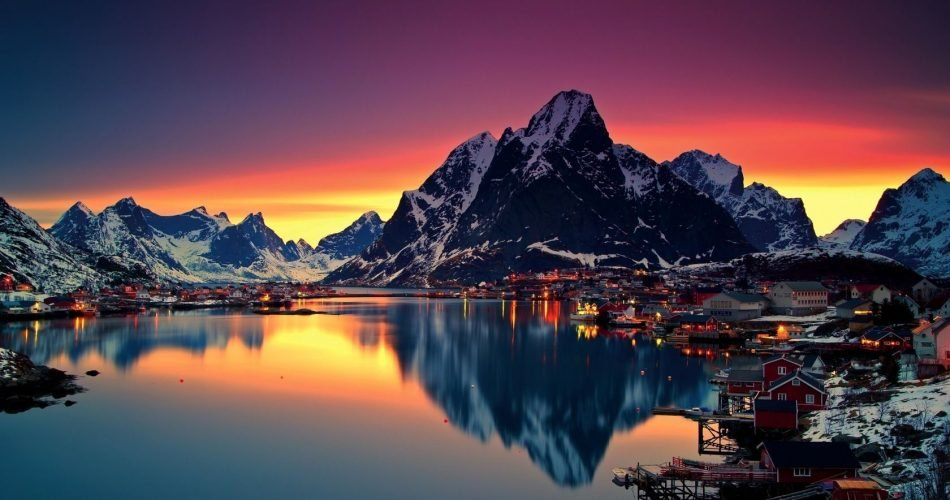

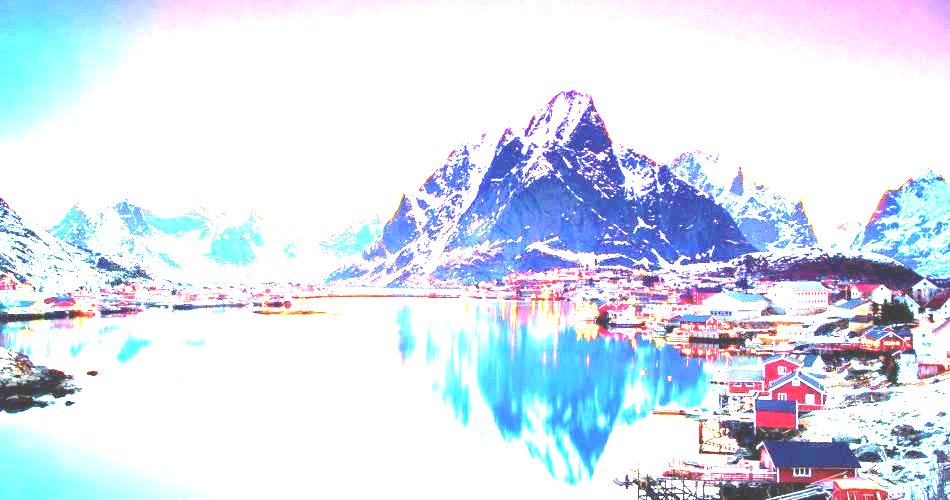

In [ ]:
foto = cv2.imread('montanha.jpg')
alterabrilho(foto)

In [ ]:
def negativo(image:Image):
    if image.mode == 'RGBA':
        r, g, b, a = image.split()
        rgb_image = Image.merge('RGB', (r, g, b))

        inverted_image = ImageOps.invert(rgb_image)
        r2, g2, b2 = inverted_image.split()

        final_transparent_image = Image.merge('RGBA', (r2, g2, b2, a))
        cv2_imshow(np.asarray(final_transparent_image))

    else:
        inverted_image = ImageOps.invert(image)
        cv2_imshow(np.asarray(inverted_image))



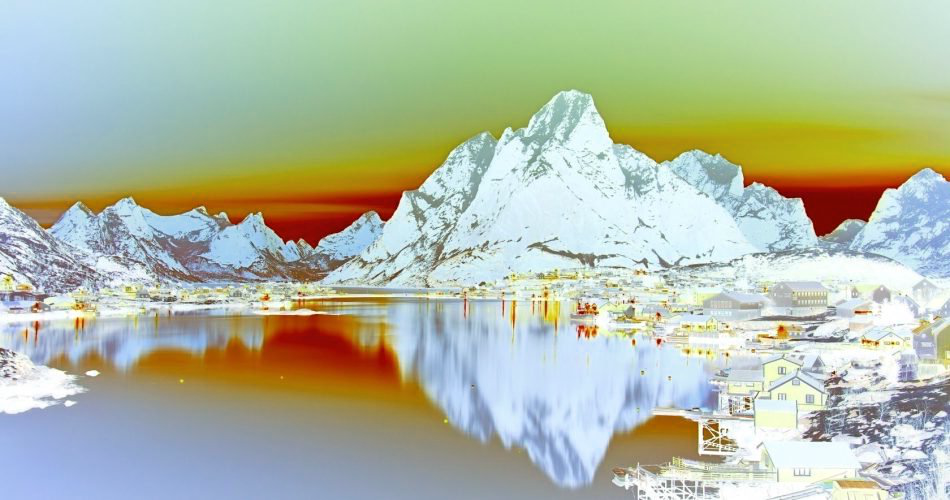

In [ ]:
image = Image.open('montanha.jpg')
negativo(image)

In [ ]:
#Histogramas da imagem em cinza
def histcinza(nome):
    if not isinstance(nome, np.ndarray):
        imag = cv2.imread(nome, 0)
    else:
        imag = cv2.cvtColor(nome, cv2.COLOR_RGB2GRAY)
        
    plt.hist(imag.ravel(), 256, [0, 256])
    

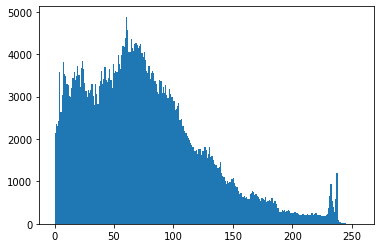

In [ ]:
histcinza("montanha.jpg")

In [ ]:
#Histograma da imagem colorida
def histcolorido(arquivo):
    img = cv2.imread(arquivo)
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim((0, 256))
        
    plt.show()




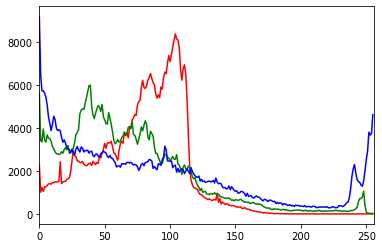

In [ ]:
histcolorido('montanha.jpg')

In [ ]:
#Ruido sal e pimenta entre 10% e 20% em imagem cinza
def ruido(ilustra):
        row, col = ilustra.shape
        pixels=row*col
        n_de_pixels = random.randint(pixels*.1,pixels*.2)
        for i in range(n_de_pixels):
                y_coord = random.randint(0, row - 1)
                x_coord = random.randint(0, col - 1)
                ilustra[y_coord][x_coord] = 255

        n_de_pixels = random.randint(pixels*.1,pixels*.2)
        for i in range(n_de_pixels):
                y_coord = random.randint(0, row - 1)
                x_coord = random.randint(0, col - 1)
                ilustra[y_coord][x_coord] = 0

        return ilustra
    


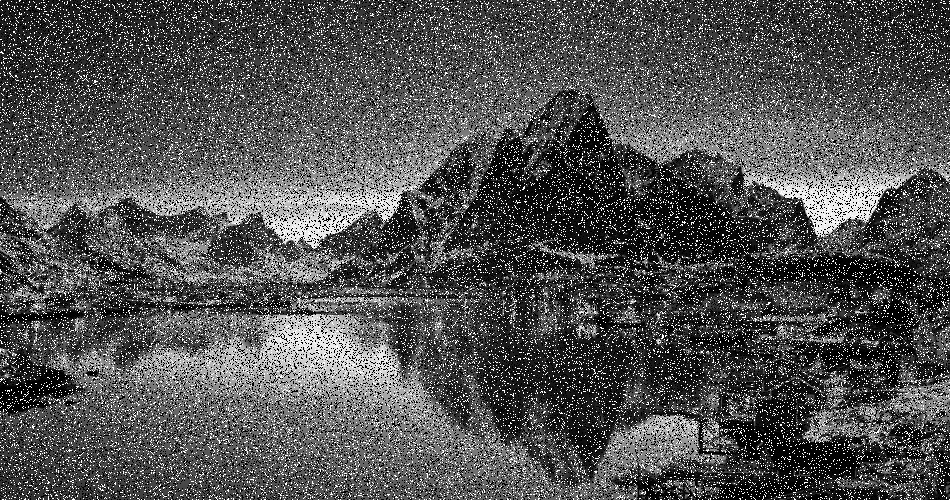

In [ ]:
foto = cv2.imread('montanha.jpg',0)
cv2_imshow(ruido(foto))

In [ ]:
def quantizar(arquivo,cores):
    foto = cv2.imread(arquivo)
    img_gaussian = cv2.GaussianBlur(foto, (3, 3), 0)
    img_float = img_gaussian.reshape((-1, 3))

    # converte para numpy float32 para realizar as operações
    img_float = np.float32(img_float)

    # define critérios e aplica a função cv2.kmeans()
    criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)


    dist, omega, img_centro = cv2.kmeans(img_float, cores, None, criterio, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Converte de volta para uint8, transformando em formato imagem
    img_centro = np.uint8(img_centro)
    resultado = img_centro[omega.flatten()]
    resultado = resultado.reshape(foto.shape)

    cv2_imshow(resultado)




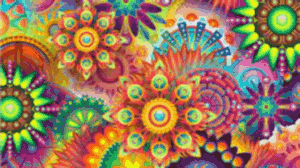

In [ ]:
quantizar('flores.jpeg',100)

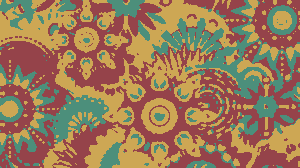

In [ ]:
quantizar('flores.jpeg',3)

In [ ]:
def equalizarhistograma(nome):

    img = cv2.imread(nome)
    img_to_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)  # Usa BGR pois o opencv trabalha com BGR e não RGB

    img_to_yuv[:, :, 0] = cv2.equalizeHist(img_to_yuv[:, :, 0])

    hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
    cv2_imshow(img)
    cv2_imshow(hist_equalization_result)


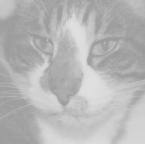

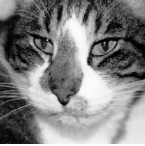

In [ ]:
equalizarhistograma('gato.png')

In [ ]:
def deteccaodebordas(nome):
    
    foto = cv2.imread(nome)
    gray = cv2.cvtColor(foto, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray, (3, 3), 0)


    kernel = np.array([[-1.5, -1.5, -1.5], [-1.5, 12, -1.5], [-1.5, -1.5, -1.5]])


    img_karnel = cv2.filter2D(foto, -1, kernel)  # Aplica o filtro de karnel na imagem
    foto = img_karnel  # Atualiza a img a ser editada, para poder realizar edição sobre edição.

    cv2_imshow(img_karnel)


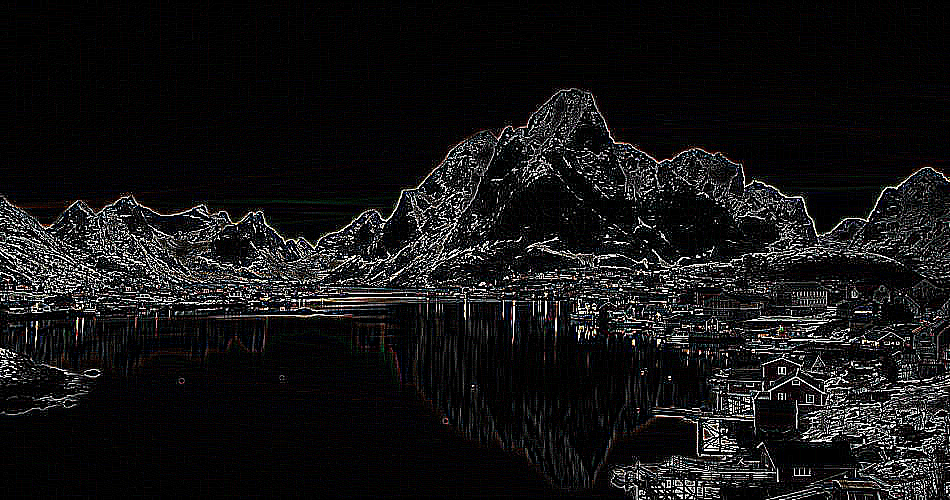

In [ ]:
deteccaodebordas('montanha.jpg')

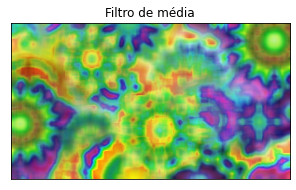

In [ ]:
def filtrodemedia(nome):
    image = cv2.imread(nome) # reads the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
    bloco = 9 # the dimension of the x and y axis of the kernal.
    new_image = cv2.blur(image,(bloco, bloco))
    plt.figure(figsize=(11,6))
    #plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
    #plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Filtro de média')
    plt.xticks([]), plt.yticks([])
    plt.show()
    
filtrodemedia('flores.jpeg')

In [ ]:
def filtromediana(nome):
    image = cv2.imread(nome)  # reads the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # convert to HSV

    bloco = 25

    image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    new_image = cv2.medianBlur(image2, bloco)
    plt.figure(figsize=(11, 6))
    plt.subplot(121), plt.imshow(image2, cmap='gray'), plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(new_image, cmap='gray'), plt.title('Filtro de Mediana')
    plt.xticks([]), plt.yticks([])
    filtrodemedia(nome)
    plt.show()



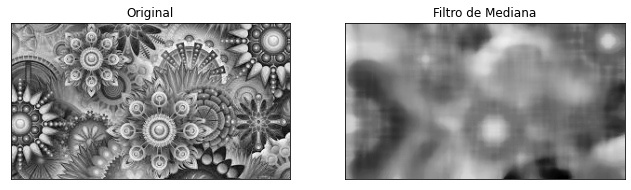

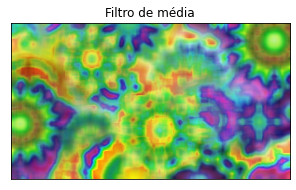

In [ ]:
filtromediana('flores.jpeg')

In [ ]:
def filtrogauss(nome):
    image = cv2.imread(nome) # reads the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
    bloco=9

    new_image = cv2.GaussianBlur(image, (bloco, bloco),0)
    plt.figure(figsize=(11,6))
    plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Filtro Gaussiano')
    plt.xticks([]), plt.yticks([])
    filtrodemedia(nome)
    plt.show()


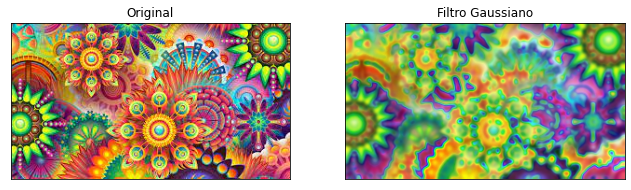

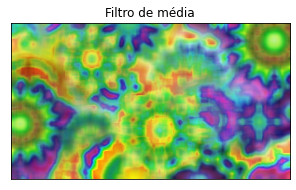

In [ ]:
filtrogauss('flores.jpeg')

In [ ]:
def particionaimagem(nome):
    original = Image.open(nome)

    width, height = original.size   # Obtem o tamanho
    bottom = height   
    top = 0
    for i in range(3):
        left = i*width/3
        right = (i+1)*width/3
        
        cropped = original.crop((left, top, right, bottom))
        
        histcinza(np.asarray(cropped))
    


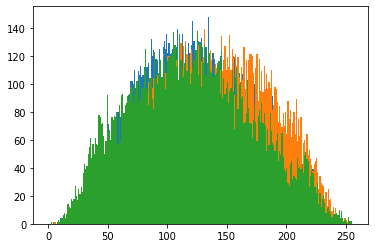

In [ ]:
imagem = "flores.jpeg"
particionaimagem(imagem)